In [231]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from datetime import datetime
from scipy.sparse import csr_matrix
from sklearn import datasets, svm, metrics

In [232]:
n_events = 1
n_pmt = 60

x, _class = make_gaussian_quantiles(mean = (9,9), cov = 1,
                                         n_samples = n_pmt, n_features = 2,
                                         n_classes = 1, random_state = 0) 
    
# This is slightly confusing, make_gaussian_quantiles defines the variable x as an n x 2 matrix of x, y coordinates
# Now, I'm simply separating that matrix into two arrays: one array of x coordinates, one array of y coordinates

x_coord_array = x[:, 0]
y_coord_array = x[:, 1]

is_point = np.arange(0, len(x_coord_array), 1)

# At some point, ask Udara on what grid system HAWC is built.  Hopefully, the origin is not in the center. 
# I think I can define it myself... 

for i in range(n_pmt):
    is_point[i] = 1
    x_coord_array[i] = "{0:.1f}".format(x_coord_array[i])
    y_coord_array[i] = "{0:.1f}".format(y_coord_array[i])

print(x_coord_array)
print(y_coord_array)
print(is_point)

pixels = np.arange(0, 17, 0.1)
x_indeces = x_coord_array*10
y_indeces = y_coord_array*10

print(x_indeces)

x_min, x_max = x_indeces.min() - 10, x_indeces.max() + 10
y_min, y_max = y_indeces.min() - 10, y_indeces.max() + 10

[  8.5   8.3   9.4  10.5   8.9   7.7   7.8   9.8  11.3  10.9   8.7   9.4
   8.1   8.2  10.8   6.4   9.    9.2   9.2   9.1   8.1   9.9   8.1   8.4
   9.1   9.3  10.2   9.    9.7  10.5  10.9   7.8   8.6  10.9   8.1   7.4
   9.    9.5   8.6   7.4   7.9   8.7  10.2  10.   10.    9.2   8.6   9.6
   8.7   7.3  10.9   9.9   7.7   8.   10.5   9.4   8.1  10.1   8.5   9.1]
[  7.8   8.6   8.3   8.8   9.4   9.8   9.9   9.1   7.5   7.7   9.8   9.7
   7.    7.3   9.4   9.7   8.8   9.4   8.6   9.4   9.4   8.8  10.9   8.6
   9.3   8.1  10.2   9.4   9.1  10.5  10.5  10.9  10.2   8.    8.4   9.5
  10.8   7.5   8.7   8.8  10.1   9.2   8.8  11.2   8.8  10.    8.3   9.9
   9.1  11.    9.9   8.3  10.    7.6  10.9   9.3   9.1   7.8   8.6  10.5]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[  85.   83.   94.  105.   89.   77.   78.   98.  113.  109.   87.   94.
   81.   82.  108.   64.   90.   92.   92.   91.   81.   99.   81.   84.

In [233]:
image = csr_matrix((is_point, (x_indeces, y_indeces)), shape = (len(pixels), len(pixels))).toarray() #These parentheses are important
target = [0]
print(image)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [234]:
# is_point = np.zeros(len(pixels))

# for j in range(n_pmt):
    
image_target = list((image, target))


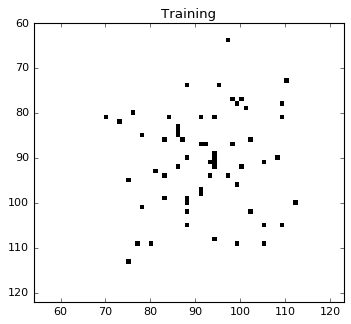

In [235]:
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xlim(x_min, x_max)
plt.ylim(y_max, y_min)
plt.title('Training')